<a href="https://colab.research.google.com/github/miramartha/customer-shopping-analysis/blob/main/notebook/customer_shopping_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# ---------------------------------------------------------
# 1. IMPORT LIBRARIES
# ---------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

sns.set(style="whitegrid")

In [26]:
# ---------------------------------------------------------
# 2. LOAD DATA
# ---------------------------------------------------------
import pandas as pd

url = "https://raw.githubusercontent.com/miramartha/customer-shopping-analysis/main/shopping_trends.csv"
df = pd.read_csv(url)

print("Shape:", df.shape)
df.head()

Shape: (3900, 19)


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [28]:
# ---------------------------------------------------------
# 3. DATA CLEANING
# ---------------------------------------------------------

# Cek missing value
print("Missing values:")
print(df.isnull().sum())

# Drop duplicates
df = df.drop_duplicates()

# Convert categorical columns
cat_cols = df.select_dtypes(include="object").columns
for col in cat_cols:
    df[col] = df[col].astype("category")

# Basic describes
df.describe(include="all")

Missing values:
Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,6,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Credit Card,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,696,675,2223,2223,NaN,677,584
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.749949,NaN,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716223,NaN,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


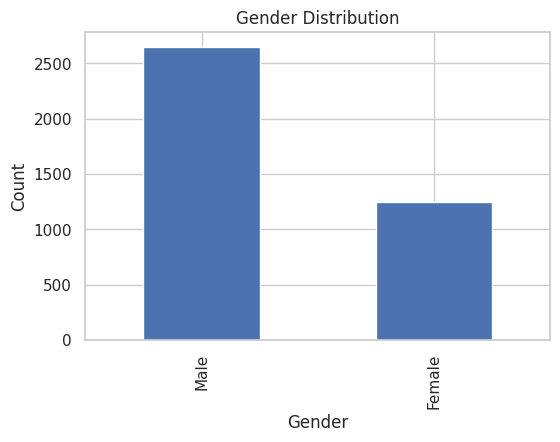

In [29]:
# ---------------------------------------------------------
# 4. EXPLORATORY DATA ANALYSIS (EDA)
# ---------------------------------------------------------

# 4.1 Gender distribution
plt.figure(figsize=(6,4))
df["Gender"].value_counts().plot(kind="bar")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

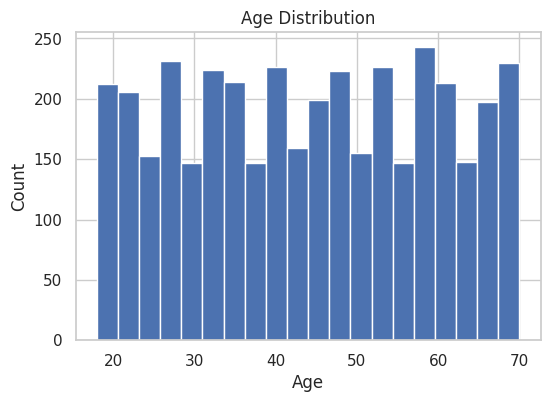

In [30]:
# 4.2 Age distribution
plt.figure(figsize=(6,4))
plt.hist(df["Age"], bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

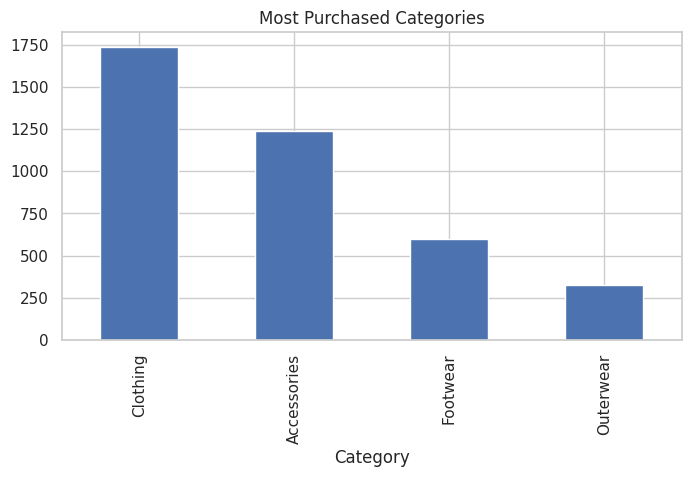

In [31]:
# 4.3 Product Category
plt.figure(figsize=(8,4))
df["Category"].value_counts().plot(kind="bar")
plt.title("Most Purchased Categories")
plt.show()

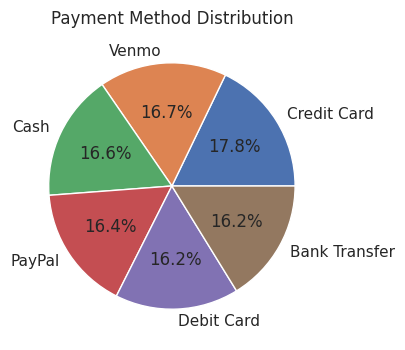

In [32]:
# 4.4 Payment Methods
plt.figure(figsize=(6,4))
df["Payment Method"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Payment Method Distribution")
plt.ylabel("")
plt.show()

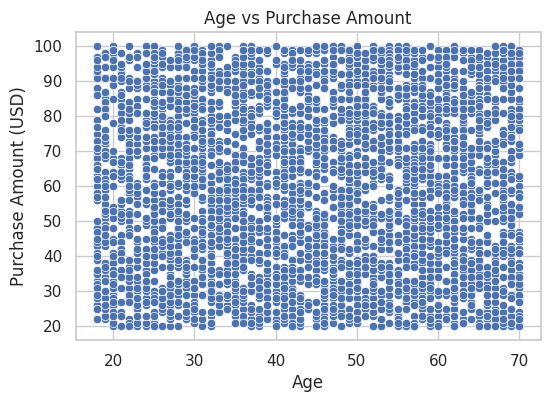

In [33]:
# 4.5 Relationship between Purchase Amount & Age
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Age", y="Purchase Amount (USD)")
plt.title("Age vs Purchase Amount")
plt.show()

In [34]:
# ---------------------------------------------------------
# 5. FEATURE ENGINEERING
# ---------------------------------------------------------

# Encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# Standardize numeric columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

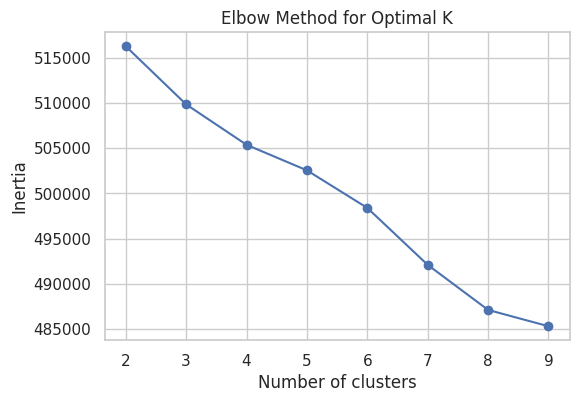

In [35]:
# ---------------------------------------------------------
# 6. K-MEANS CLUSTERING
# ---------------------------------------------------------
# Determine optimal K using elbow method
inertia = []
K_range = range(2, 10)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    inertia.append(model.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker="o")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

# Use K = 4 (umumnya paling stabil)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df_scaled)
df["Cluster"] = clusters

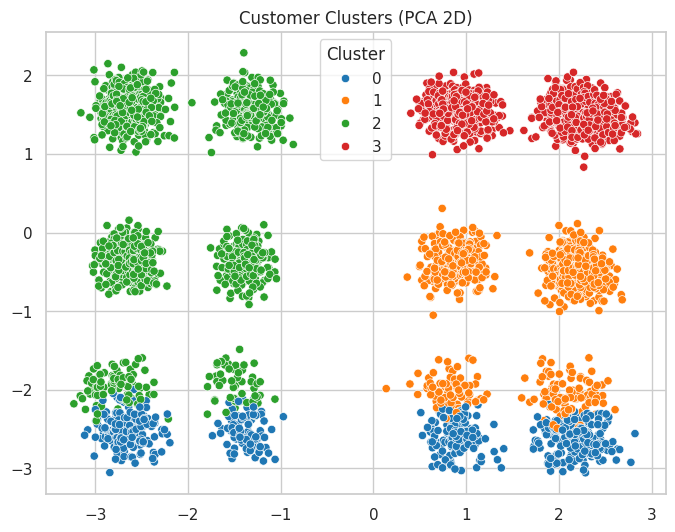

In [36]:
# ---------------------------------------------------------
# 7. PCA FOR VISUALIZATION
# ---------------------------------------------------------
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=df["Cluster"], palette="tab10")
plt.title("Customer Clusters (PCA 2D)")
plt.show()

,count
item_purchased,
Blouse,171
Pants,171
Jewelry,171
Shirt,169
Dress,166
Sweater,164
Jacket,163
Coat,161
Sunglasses,161


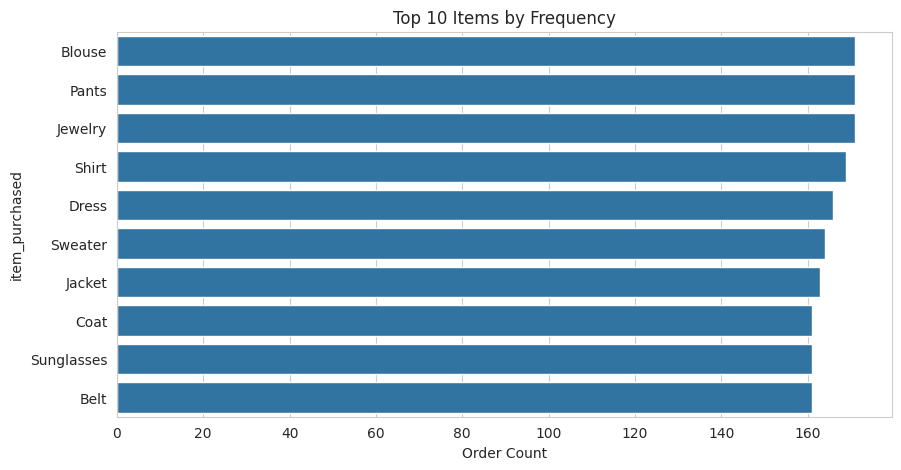

,category,sum,count,mean
0,Clothing,104264,1737,60.025331
1,Accessories,74200,1240,59.838710
2,Footwear,36093,599,60.255426
3,Outerwear,18524,324,57.172840


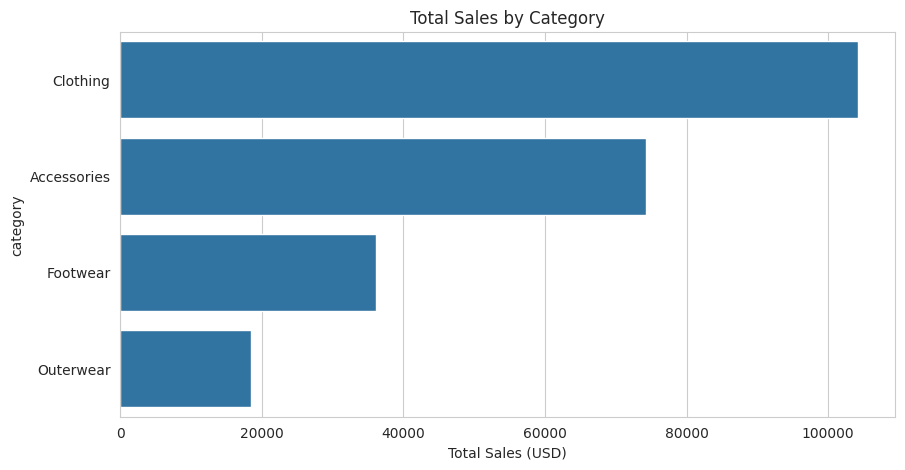

In [ ]:
# -------------------------
# 8. Top products & category analysis
# -------------------------
if 'item_purchased' in df_clean.columns:
    top_items = df_clean['item_purchased'].value_counts().head(10)
    display(top_items)
    sns.barplot(y=top_items.index, x=top_items.values)
    plt.title('Top 10 Items by Frequency')
    plt.xlabel('Order Count')
    plt.show()

if 'category' in df_clean.columns and amt_col:
    cat_sales = df_clean.groupby('category')[amt_col].agg(['sum','count','mean']).sort_values('sum', ascending=False).reset_index()
    display(cat_sales)
    sns.barplot(data=cat_sales, x='sum', y='category')
    plt.title('Total Sales by Category')
    plt.xlabel('Total Sales (USD)')
    plt.show()


,gender,mean,count
0,Female,60.249199,1248
1,Male,59.536199,2652


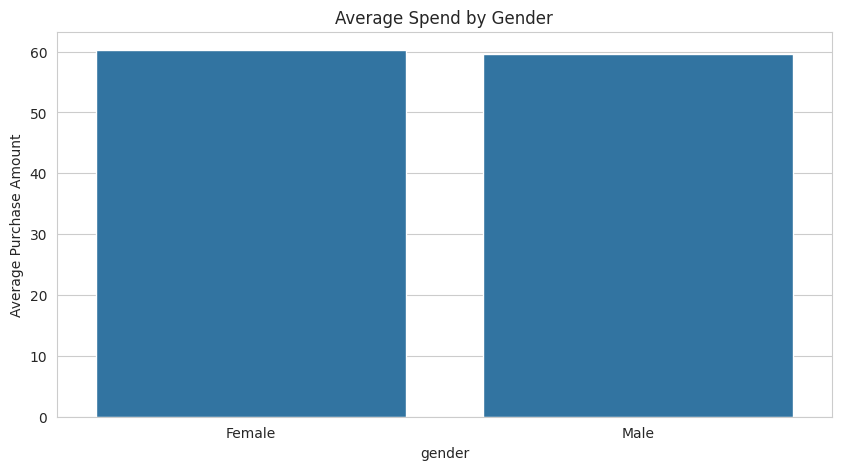

/tmp/ipython-input-3704856090.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a = df_clean.groupby('age_group')[amt_col].agg(['mean','count']).reset_index()


,age_group,mean,count
0,<18,NaN,0
1,18-24,60.201646,486
2,25-34,60.132450,755
3,35-44,59.620027,729
4,45-54,60.332447,752
5,55-64,58.716378,751
6,65+,59.704918,427


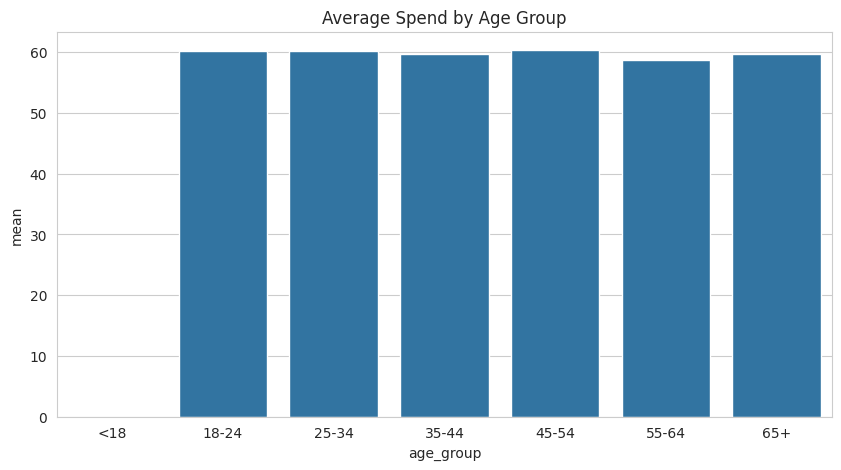

In [ ]:
# -------------------------
# 8. Demographics: gender, age_group, location
# -------------------------
# Gender vs avg spend
if 'gender' in df_clean.columns and amt_col:
    g = df_clean.groupby('gender')[amt_col].agg(['mean','count']).reset_index().sort_values('mean', ascending=False)
    display(g)
    sns.barplot(data=g, x='gender', y='mean')
    plt.title('Average Spend by Gender')
    plt.ylabel('Average Purchase Amount')
    plt.show()

# Age group vs spend (if exists)
if 'age_group' in df_clean.columns and amt_col:
    a = df_clean.groupby('age_group')[amt_col].agg(['mean','count']).reset_index()
    display(a)
    sns.barplot(data=a, x='age_group', y='mean')
    plt.title('Average Spend by Age Group')
    plt.show()


,location,sum,count
25,Montana,5784,96
12,Illinois,5617,92
4,California,5605,95
11,Idaho,5587,93
27,Nevada,5514,87
0,Alabama,5261,89
31,New York,5257,87
33,North Dakota,5220,83
47,West Virginia,5174,81
26,Nebraska,5172,87


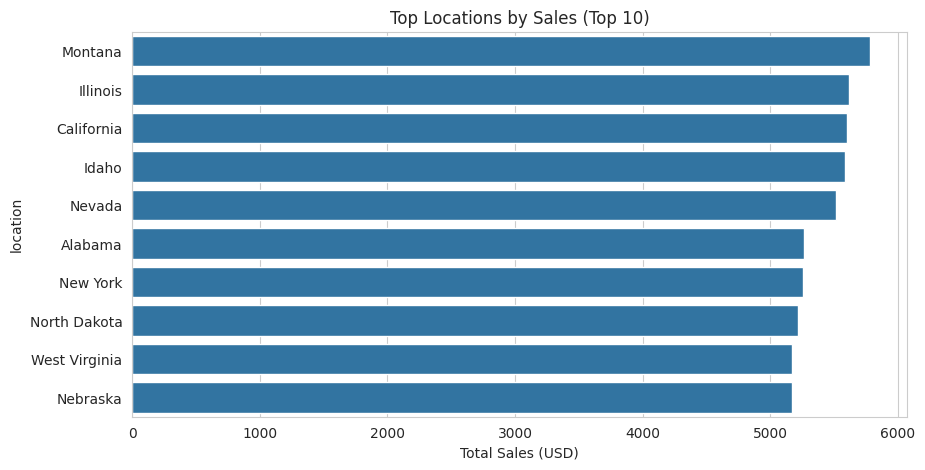

,shipping_type,count
0,Free Shipping,675
1,Standard,654
2,Store Pickup,650
3,Next Day Air,648
4,Express,646
5,2-Day Shipping,627


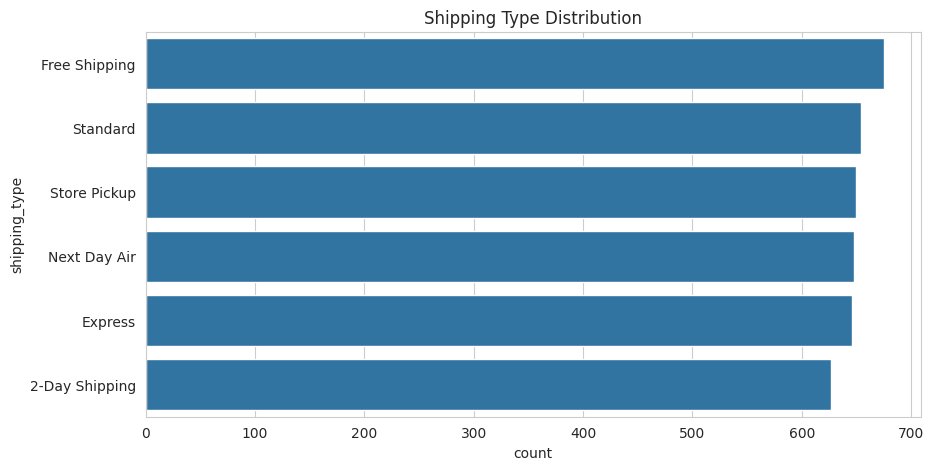

In [ ]:
# -------------------------
# 9. Location & shipping type analysis
# -------------------------
if 'location' in df_clean.columns and amt_col:
    loc = df_clean.groupby('location')[amt_col].agg(['sum','count']).reset_index().sort_values('sum', ascending=False).head(10)
    display(loc)
    sns.barplot(data=loc, x='sum', y='location')
    plt.title('Top Locations by Sales (Top 10)')
    plt.xlabel('Total Sales (USD)')
    plt.show()

if 'shipping_type' in df_clean.columns:
    st = df_clean['shipping_type'].value_counts().reset_index()
    st.columns = ['shipping_type', 'count']
    display(st)
    sns.barplot(data=st, x='count', y='shipping_type')
    plt.title('Shipping Type Distribution')
    plt.show()


In [ ]:
# -------------------------
# 10. Effects of discounts, promo, subscription
# -------------------------
# Discount flag effect on avg spend
if 'discount_flag' in df_clean.columns and amt_col:
    dd = df_clean.groupby('discount_flag')[amt_col].agg(['mean','count']).reset_index()
    display(dd)

# Subscription effect
if 'subscription_flag' in df_clean.columns and amt_col:
    sd = df_clean.groupby('subscription_flag')[amt_col].agg(['mean','count']).reset_index()
    display(sd)


,discount_flag,mean,count
0,0,60.130454,2223
1,1,59.279070,1677


,subscription_flag,mean,count
0,0,59.865121,2847
1,1,59.491928,1053


,previous_purchases,review_rating,purchase_amount_usd
previous_purchases,1.000000,0.004229,0.008063
review_rating,0.004229,1.000000,0.030776
purchase_amount_usd,0.008063,0.030776,1.000000


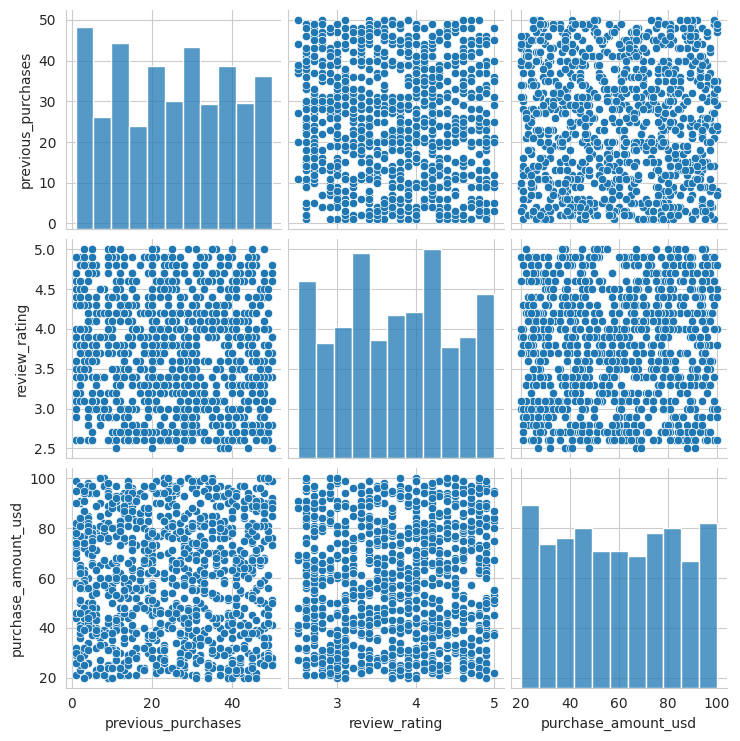

In [ ]:
# -------------------------
# 11. Correlation: previous purchases vs amount, review_rating vs amount
# -------------------------
corr_cols = []
if 'previous_purchases' in df_clean.columns:
    corr_cols.append('previous_purchases')
if 'review_rating' in df_clean.columns:
    corr_cols.append('review_rating')
if amt_col:
    corr_cols.append(amt_col)

if len(corr_cols) >= 2:
    display(df_clean[corr_cols].corr())
    sns.pairplot(df_clean[corr_cols].dropna().sample(min(1000, len(df_clean))))
    plt.show()


In [ ]:
# -------------------------
# 12. Simple customer segmentation idea (RFM-ish proxy)
# -------------------------
# Note: without last_purchase_date we cannot compute recency. We'll do frequency + monetary + previous_purchases
if 'frequency_of_purchases' in df_clean.columns and amt_col:
    # convert frequency category to ordinal approx
    freq_map = {
        'Daily': 365, 'Weekly': 52, 'Fortnightly': 26, 'Monthly': 12, 'Quarterly': 4, 'Semi-Annually': 2, 'Annually':1
    }
    df_clean['frequency_numeric'] = df_clean['frequency_of_purchases'].map(lambda x: freq_map.get(str(x).strip(), np.nan))
    seg = df_clean.groupby('customer_id').agg({
        amt_col: 'sum',
        'frequency_numeric': 'mean',
        'previous_purchases': 'mean'
    }).rename(columns={amt_col:'total_spent'}).reset_index()
    display(seg.head())


,customer_id,total_spent,frequency_numeric,previous_purchases
0,1,53,26.0,14.0
1,2,64,26.0,2.0
2,3,73,52.0,23.0
3,4,90,52.0,49.0
4,5,49,1.0,31.0


In [ ]:
# -------------------------
# 13. Save cleaned sample and summary outputs (optional)
# -------------------------
# Save a sample cleaned CSV to download and upload to repo if needed
df_clean.head(100).to_csv('shopping_clean_sample.csv', index=False)
print("Saved sample cleaned file: shopping_clean_sample.csv")


Saved sample cleaned file: shopping_clean_sample.csv
